# Model Comparison

This notebook will compare two types of models on the same data.

Using a Wine dataset, we'll create two models. One model is a RandomForrest the other will be a decision tree.

We'll try to predict the class of the wine use the other features

To compare the models, we'll compare roughly on accuracy, but also on Time Taken to execute.

In [21]:
# import our dependencies
# This is the model we'll be using.
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz
import pandas as pd
import seaborn as sns
import time

%matplotlib inline

In [4]:
# import the dataset
wine_df = pd.read_csv("data/wine.csv")

In [5]:
wine_df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,one
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,one
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,one
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,one
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,one


# Prepare Data

Let's first gain some initial insight into the structure of the data. We want to define our features and target, then use a heatmap to see how correlated our features are to one-another. Then split into training and testing set

In [6]:
features = wine_df.drop(columns=["Class"])
target = wine_df["Class"]

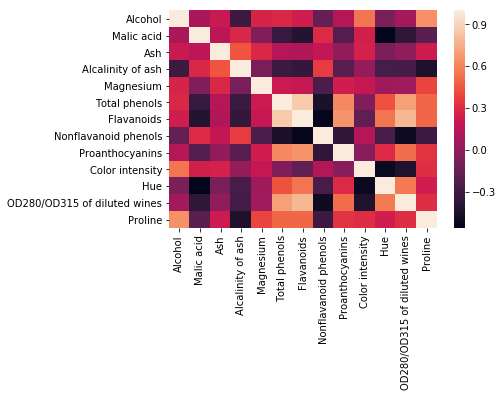

In [8]:
# generate the heatmap
sns.heatmap(features.corr())

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [25]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=20)

In [26]:
# Initialize and train our tree.
# compute the time taken to execute
st = time.time()
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=10,
    random_state = 1337
)
decision_tree.fit(X_train, y_train)

decision_tree_scores = cross_val_score(decision_tree, X_test, y_test, cv=5)

accuracy = decision_tree_scores.mean()

print("Accuracy Score: {}".format(accuracy))

runtime = time.time() - st

print("Runtime: {} seconds".format(runtime))

Accuracy Score: 0.855952380952381
Runtime: 0.014526128768920898 seconds


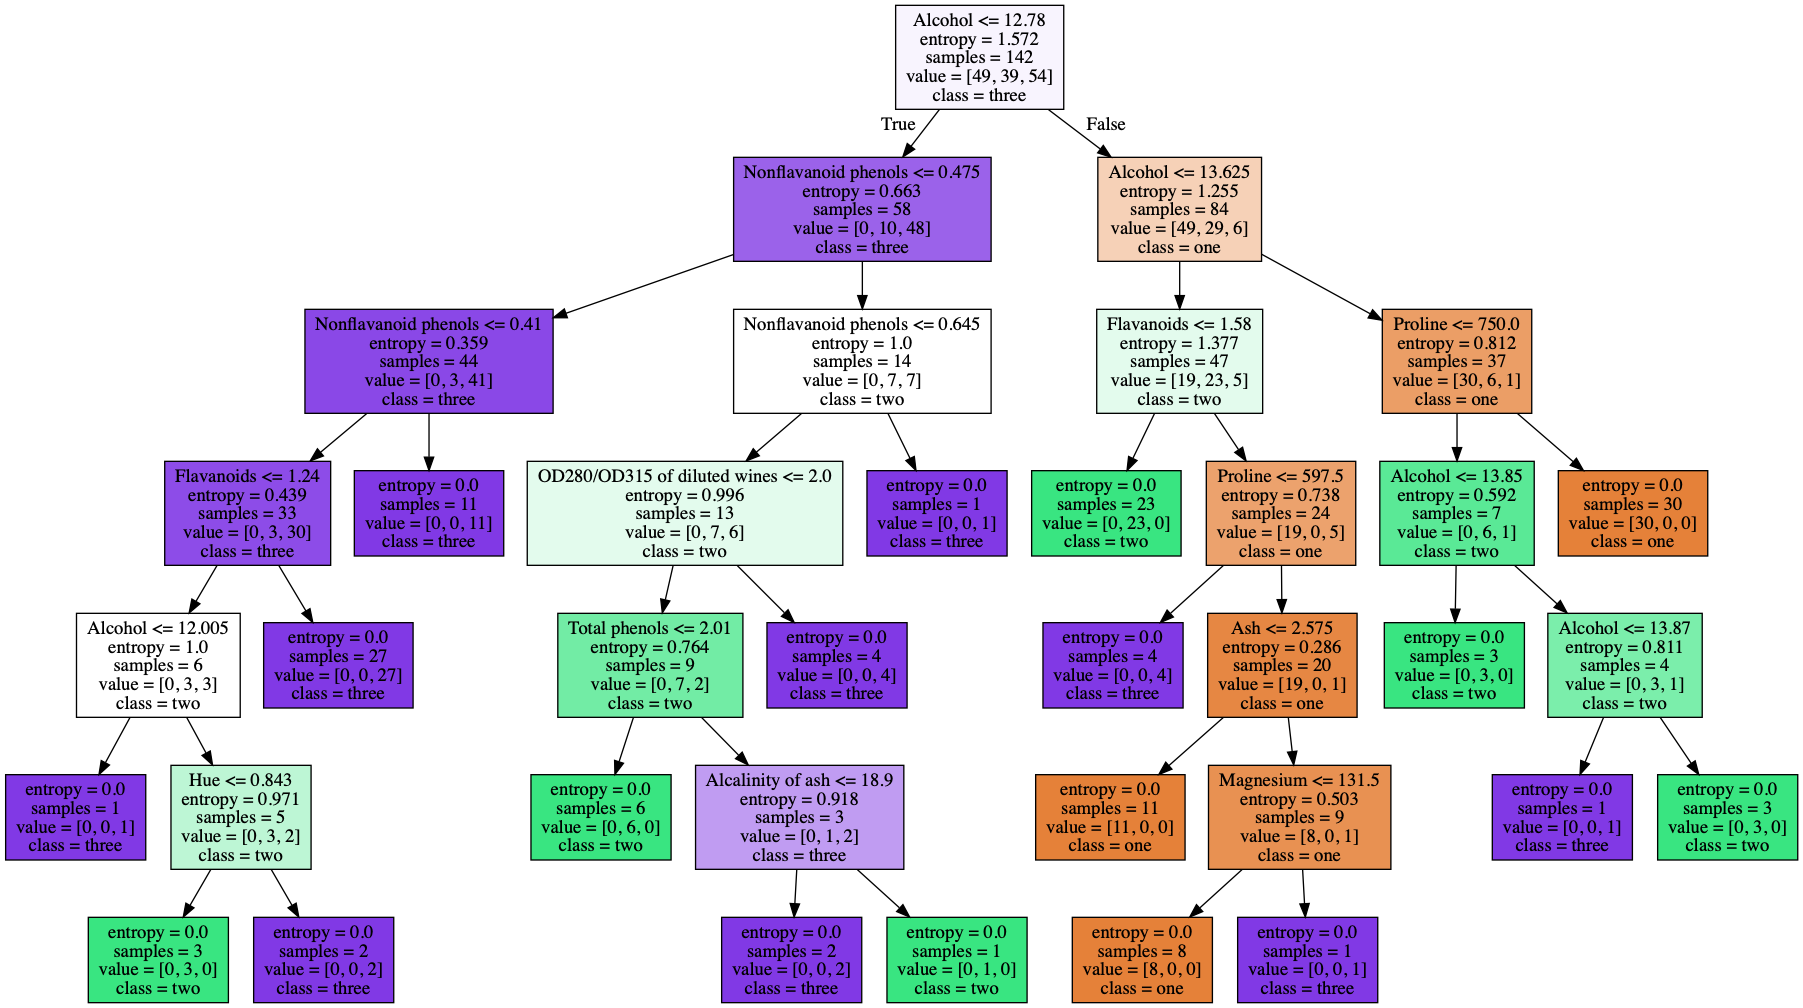

In [20]:
# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=features.columns,
    class_names=['one', 'two', 'three'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [27]:
# random forrest model

st = time.time()

rm = RandomForestClassifier(criterion="entropy", random_state=1337)

rm.fit(X_train, y_train)

rm_scores = cross_val_score(rm, X_test, y_test, cv=5)

accuracy = rm_scores.mean()

print("Accuracy: {}".format(accuracy))

runtime = time.time() - st

print("Runtime: {} seconds".format(runtime))

Accuracy: 0.9714285714285715
Runtime: 0.09085679054260254 seconds


It looks like RandomForrest was roughly 9x slower than a simple decision tree